# 2 лабораторная

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import seaborn as sns

CarPrices = pd.read_csv(".//static//csv//car_price_prediction.csv")
Forbes = pd.read_csv(".//static//csv//ForbesBillionaires.csv")
GoogleStockPriceChart = pd.read_csv(".//static//csv//GOOGLEstockPrice.csv")

print(CarPrices.columns)

print(Forbes.columns)
print(GoogleStockPriceChart.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')
Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


# 1. Рынок автомобилей
### Проблемная область
Данные могут быть использованы для анализа рынка автомобилей, прогнозирования цен, определения факторов, влияющих на стоимость автомобилей, и т.д.
Прогнозирование цен на автомобили для оптимизации ценовой политики. 

  - **Эффект для бизнеса:** Повышение конкурентоспособности за счет более точного ценообразования, увеличение продаж.
  
 **Техническая цель:** Разработка модели машинного обучения для прогнозирования цен на автомобили.
  - **Вход:** Атрибуты автомобиля (производитель, модель, год выпуска, пробег и т.д.).
  - **Целевой признак:** Цена автомобиля.

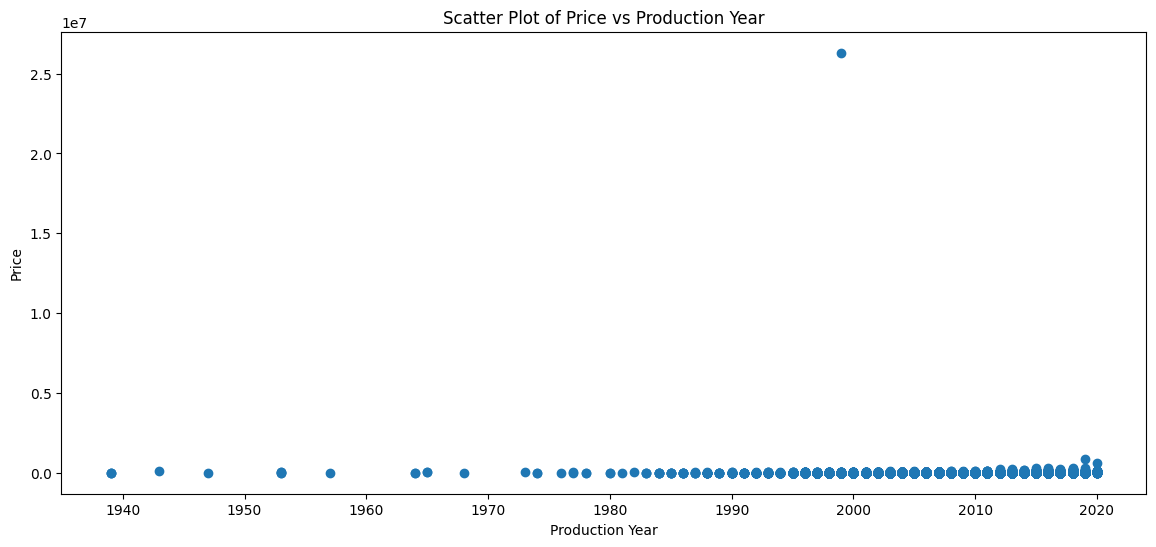

In [54]:
CarPrices['Prod. year'] = pd.to_datetime(CarPrices['Prod. year'], format='%Y')

plt.figure(figsize=(14, 6))
plt.scatter(CarPrices['Prod. year'], CarPrices['Price'])
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Production Year')
plt.show()

Мы видим 1 выброс, который очень выделяется среди других результатов в данном датасете
Зашумленность невысокая. Выброс был удален с помощью пороги квантилями.

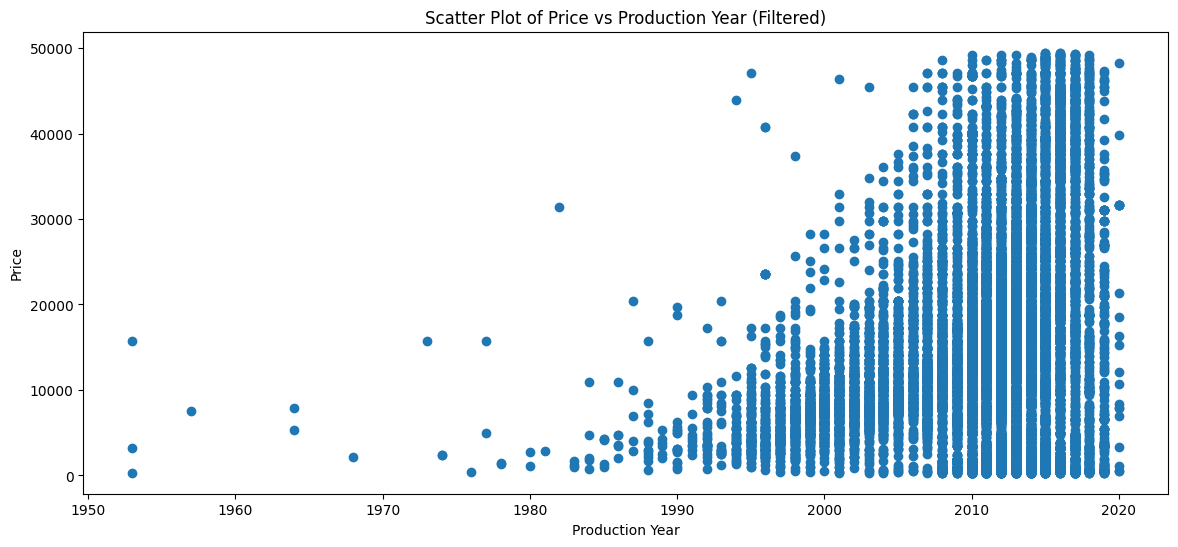

In [55]:

CarPrices['Prod. year'] = pd.to_datetime(CarPrices['Prod. year'], format='%Y')

# Определяем границы для цены с использованием квантилей
lower_bound = CarPrices['Price'].quantile(0.05)
upper_bound = CarPrices['Price'].quantile(0.95)

# Фильтруем данные, оставляя только те, которые находятся в пределах границ
df_filtered = CarPrices[(CarPrices['Price'] >= lower_bound) & (CarPrices['Price'] <= upper_bound)]

plt.figure(figsize=(14, 6))
plt.scatter(df_filtered['Prod. year'], df_filtered['Price'])
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Production Year (Filtered)')
plt.show()

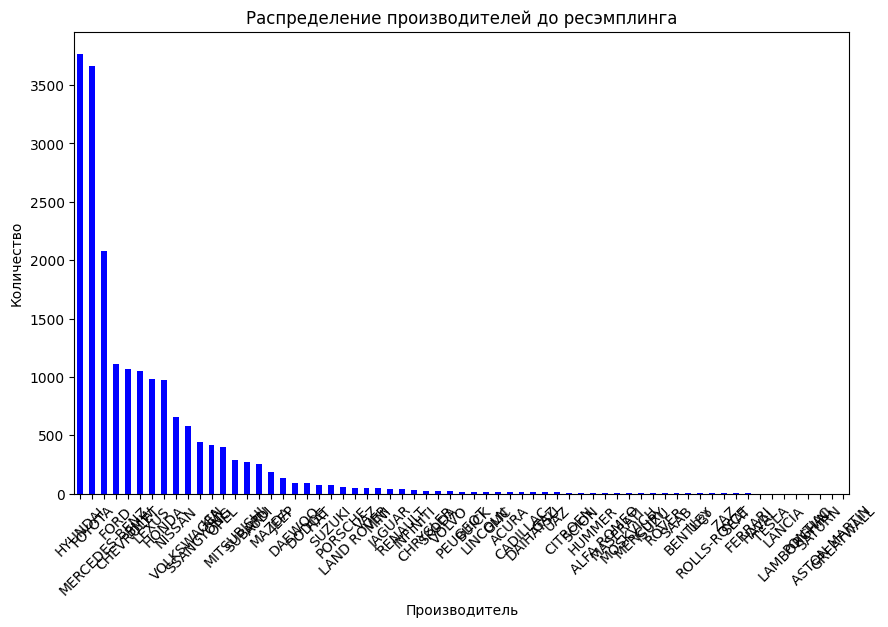

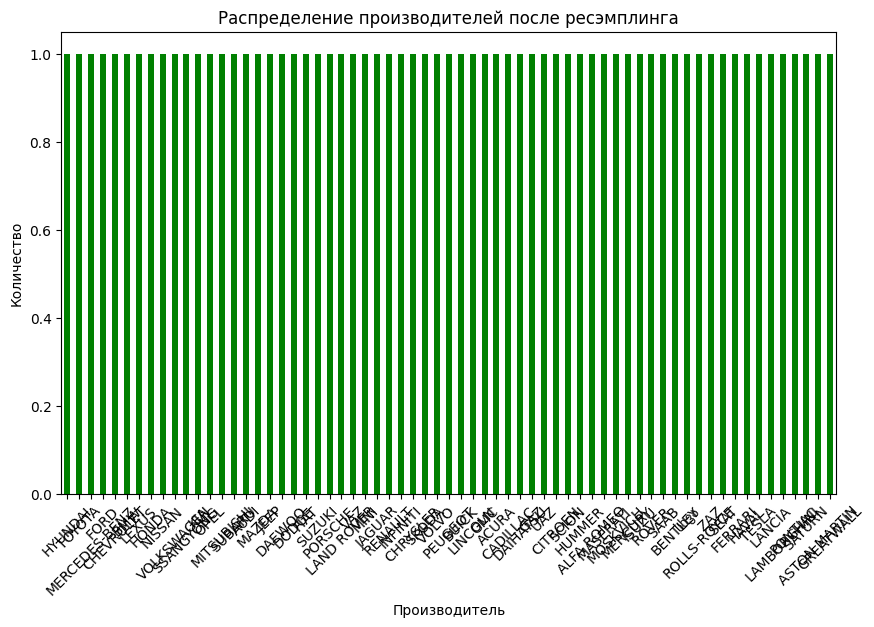

In [ ]:
plt.figure(figsize=(10, 6))
CarPrices['Manufacturer'].value_counts().plot(kind='bar', color='blue')
plt.title('Распределение производителей до ресэмплинга')
plt.xlabel('Производитель')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# resampling
manufacturer_counts = CarPrices['Manufacturer'].value_counts()
min_count = manufacturer_counts.min()
balanced_data1 = pd.concat([CarPrices[CarPrices['Manufacturer'] == manufacturer].sample(min_count) for manufacturer in manufacturer_counts.index])

plt.figure(figsize=(10, 6))
balanced_data1['Manufacturer'].value_counts().plot(kind='bar', color='green')
plt.title('Распределение производителей после ресэмплинга')
plt.xlabel('Производитель')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# 2. Список Forbes. 
https://www.kaggle.com/datasets/surajjha101/forbes-billionaires-data-preprocessed

### Проблемная область
Данные о богатейших людях мира могут быть использованы для анализа тенденций в бизнесе, инвестициях, а также для исследования факторов, влияющих на успешность бизнеса.
Анализ успешных бизнес-моделей для разработки собственной стратегии.
  - **Эффект для бизнеса:** Повышение эффективности бизнеса, увеличение прибыли за счет внедрения успешных практик.
**Техническая цель:** Анализ данных о богатейших людях для выявления факторов успеха.
  - **Вход:** Атрибуты богатейших людей (возраст, страна, источник богатства, отрасль и т.д.).
  - **Целевой признак:** Чистая стоимость.


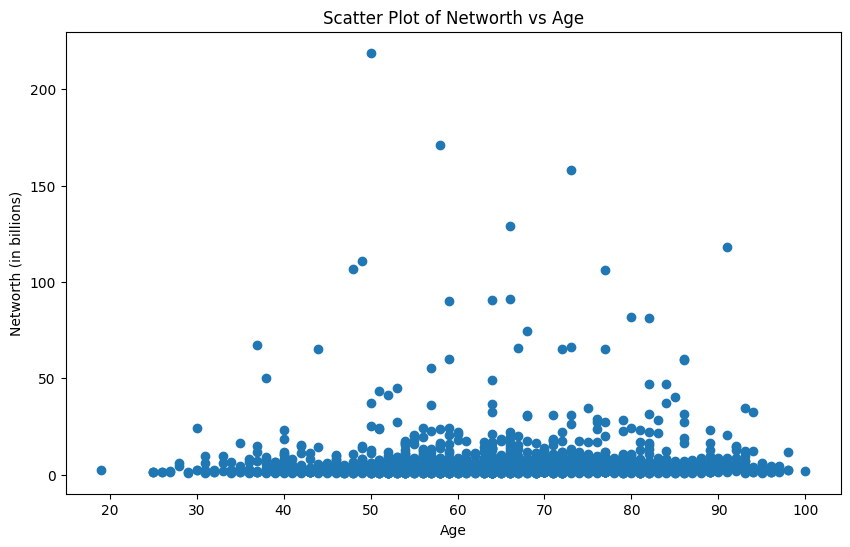

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(Forbes['Age'], Forbes['Networth'])
plt.xlabel('Age')
plt.ylabel('Networth (in billions)')
plt.title('Scatter Plot of Networth vs Age')
plt.show()

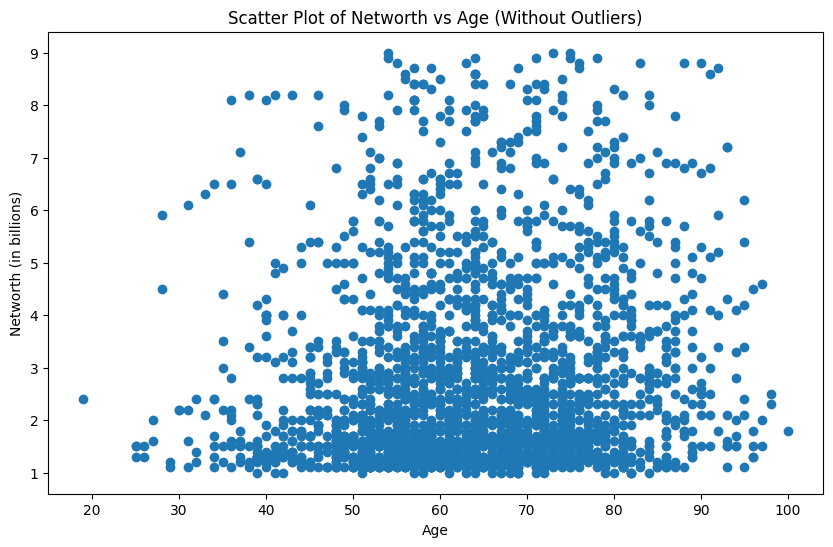

In [ ]:
# Вычисление IQR
Q1 = Forbes['Networth'].quantile(0.25)
Q3 = Forbes['Networth'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
filtered_Forbes = Forbes[(Forbes['Networth'] >= lower_bound) & (Forbes['Networth'] <= upper_bound)]

# Построение диаграммы рассеяния без выбросов
plt.figure(figsize=(10, 6))
plt.scatter(filtered_Forbes['Age'], filtered_Forbes['Networth'])
plt.xlabel('Age')
plt.ylabel('Networth (in billions)')
plt.title('Scatter Plot of Networth vs Age (без выбросов)')
plt.show()

Диаграмма выборосов получилась вполне удобной для анализа.
Выбросов немного, они не мешают анализировать данные. 


In [20]:
Forbes.head()

Rank                        Name  Networth  Age        Country  \
0      1                 Elon Musk      219.0   50  United States   
1      2                Jeff Bezos      171.0   58  United States   
2      3  Bernard Arnault & family      158.0   73         France   
3      4                Bill Gates      129.0   66  United States   
4      5            Warren Buffett      118.0   91  United States   

               Source                Industry  
0       Tesla, SpaceX             Automotive   
1              Amazon             Technology   
2                LVMH       Fashion & Retail   
3           Microsoft             Technology   
4  Berkshire Hathaway  Finance & Investments

C:\Users\user\AppData\Local\Temp\ipykernel_16592\3179761046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_networth.values, y=country_networth.index, palette='viridis')


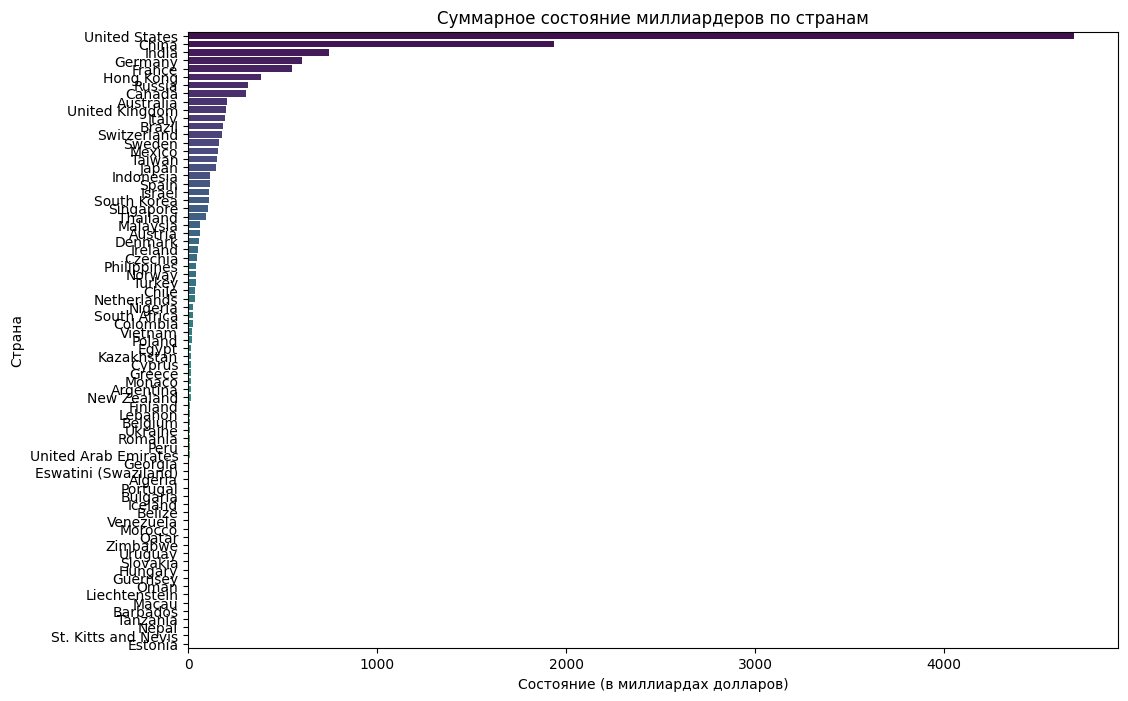

In [27]:
# Группировка по стране и суммирование состояния
country_networth = Forbes.groupby('Country')['Networth'].sum().sort_values(ascending=False)

# Визуализация данных
plt.figure(figsize=(12, 8))
sns.barplot(x=country_networth.values, y=country_networth.index, palette='viridis')
plt.title('Суммарное состояние миллиардеров по странам')
plt.xlabel('Состояние (в миллиардах долларов)')
plt.ylabel('Страна')
plt.show()
# 

Мы видим, что лидируют США и Китай, остальные страны же сильно отстают. Удалив последние 50 стран, заметим, что диаграмма стала выглядеть сбалансировано. Нам необходимо удалить данные страны.

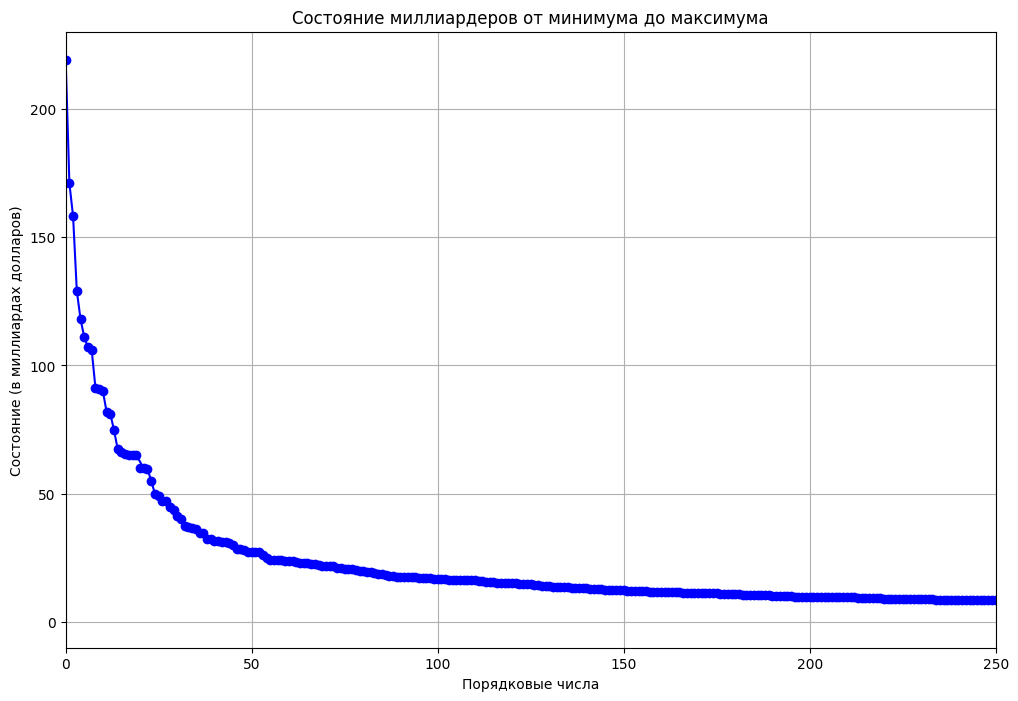

In [57]:

# Сортировка состояний людей от минимума до максимума
sorted_networth = Forbes.sort_values(by='Networth')

# Визуализация данных
plt.figure(figsize=(12, 8))
plt.plot(sorted_networth.index, sorted_networth['Networth'], marker='o', linestyle='-', color='b')
plt.title('Состояние миллиардеров от минимума до максимума')
plt.xlabel('Порядковые числа')
plt.ylabel('Состояние (в миллиардах долларов)')
plt.xlim(0, 250)  # Установка максимального значения оси X

plt.grid(True)
plt.show()

In [ ]:

# Группировка по стране и суммирование состояния
country_networth = df.groupby('Country')['Networth'].sum().sort_values(ascending=False)

# Удаление США и 20-30 стран с самыми бедными людьми
num_countries_to_remove = 30
countries_to_remove = country_networth.index[-num_countries_to_remove:].tolist() + ['United States']

# Удаление стран из датасета
filtered_df = df[~df['Country'].isin(countries_to_remove)]

# Группировка по стране и суммирование состояния для отфильтрованного датасета
filtered_country_networth = filtered_df.groupby('Country')['Networth'].sum().sort_values(ascending=False)

# Визуализация данных
plt.figure(figsize=(12, 8))
sns.barplot(x=filtered_country_networth.values, y=filtered_country_networth.index, palette='viridis')
plt.title('Суммарное состояние миллиардеров по странам (без США и 20-30 самых бедных стран)')
plt.xlabel('Состояние (в миллиардах долларов)')
plt.ylabel('Страна')
plt.show()

# 3. Финансовый рынок.
https://www.kaggle.com/datasets/varpit94/google-stock-data
### Проблемная область
Данные о ценах на акции могут быть использованы для анализа рынка, прогнозирования цен на акции, определения трендов и т.д.

## Бизнес-цели, для достижения которых могут подойти выбранные наборы данных.
Прогнозирование цен на акции для принятия решений по инвестициям.
  - **Эффект для бизнеса:** Увеличение доходности инвестиций, снижение рисков за счет более точного прогнозирования рынка.

**Техническая цель:** Разработка модели прогнозирования цен на акции.
  - **Вход:** Исторические данные о ценах на акции (открытие, закрытие, максимум, минимум, объем торгов).
  - **Целевой признак:** Цена закрытия на следующий день.


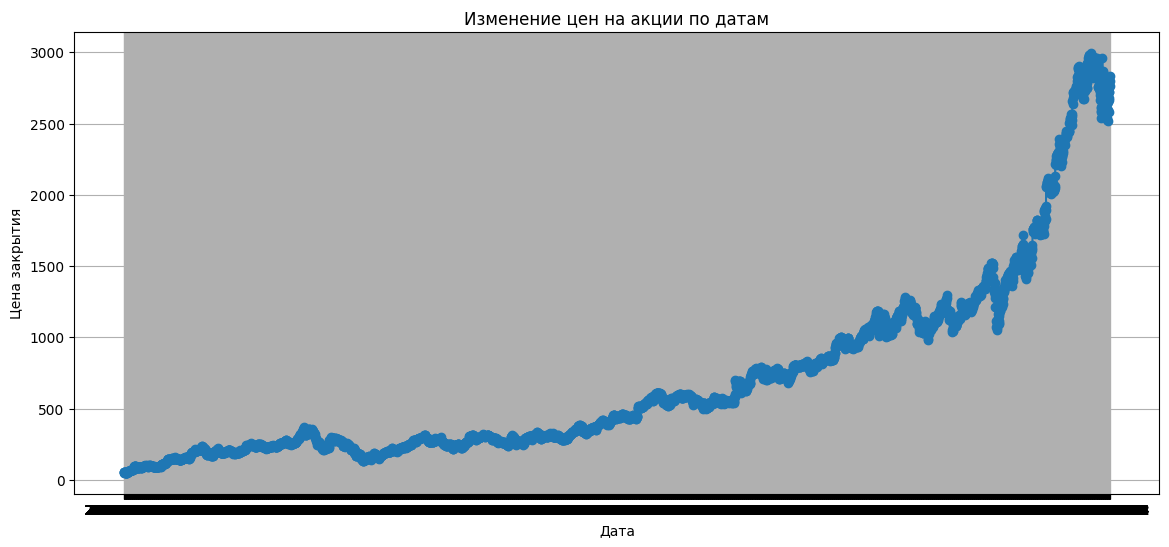

In [5]:
df_Gstocks = pd.DataFrame(GoogleStockPriceChart)

# Line Plot для цен на акции по датам
plt.figure(figsize=(14, 6))
plt.plot(df_Gstocks['Date'], df_Gstocks['Close'], marker='o')
plt.title('Изменение цен на акции по датам')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.grid(True)
plt.show()

Данные сбалансированы. Выбросов нет.


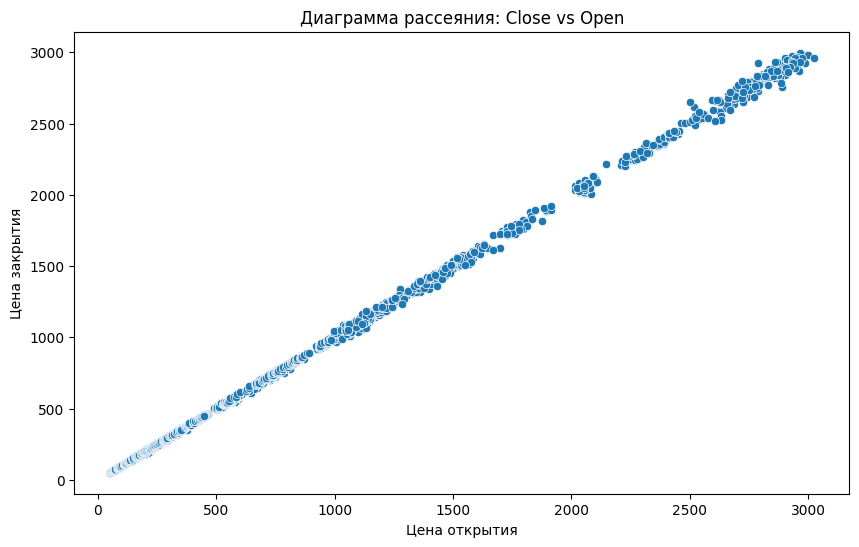

In [7]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=df_Gstocks)
plt.title('Диаграмма рассеяния: Close vs Open')
plt.xlabel('Цена открытия')
plt.ylabel('Цена закрытия')
plt.show()
